In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('../data/german_credit_data.csv', index_col=0)

# --- 1. Initial Data Inspection ---
print("--- Initial Data Inspection ---")
print(data.info())  # Show column names, data types, and non-null counts
print(data.describe())  # Summary statistics for numerical columns
data.head(20) # Display the first few rows

--- Initial Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


--- Target Variable Analysis ---


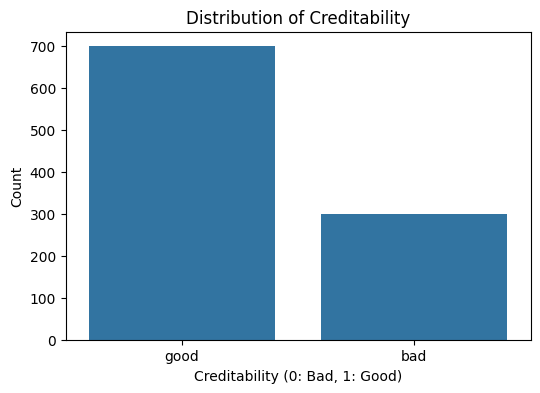

In [8]:
# --- 2. Target Variable Analysis ---
print("\n--- Target Variable Analysis ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=data)  # 'creditability' is the target
plt.title('Distribution of Creditability')
plt.xlabel('Creditability (0: Bad, 1: Good)')  # Explicit labels
plt.ylabel('Count')
plt.show()


--- Numerical Feature Analysis ---


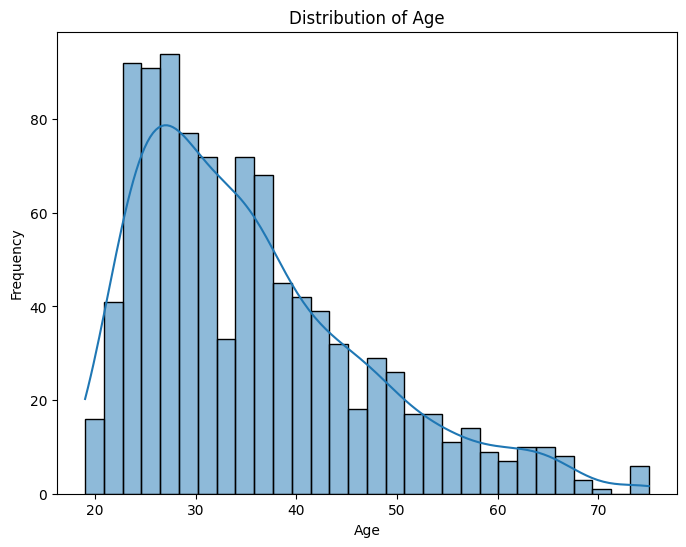

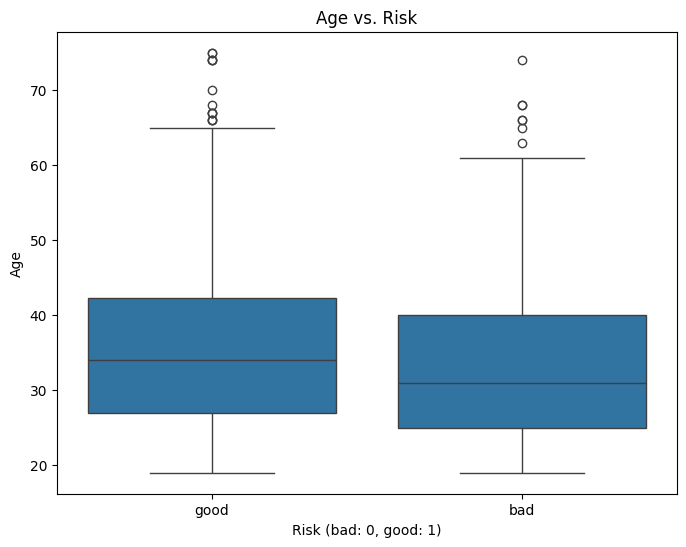

In [11]:
# --- 3. Numerical Feature Analysis ---
print("\n--- Numerical Feature Analysis ---")

# Example: Distribution of 'Age' feature
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Age', data=data)
plt.title('Age vs. Risk')
plt.xlabel('Risk (bad: 0, good: 1)')
plt.ylabel('Age')
plt.show()

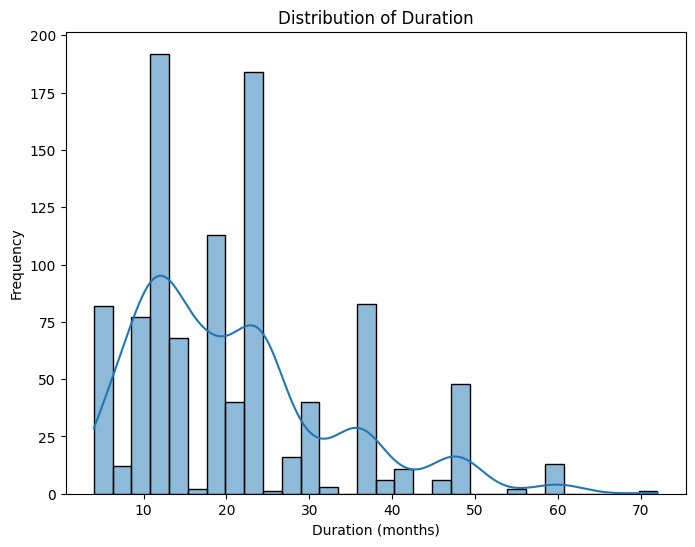

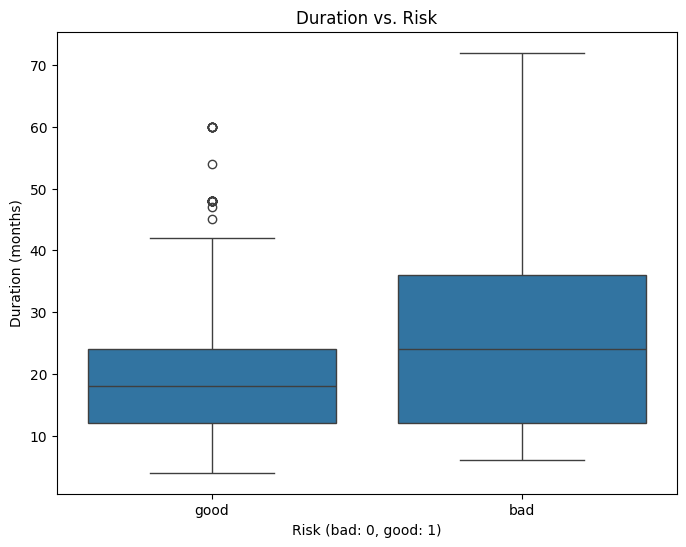

In [13]:
# Example: Distribution of 'Duration' feature
plt.figure(figsize=(8, 6))
sns.histplot(data['Duration'], bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Duration', data=data)
plt.title('Duration vs. Risk')
plt.xlabel('Risk (bad: 0, good: 1)')
plt.ylabel('Duration (months)')
plt.show()


Value Counts for Job:
Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64


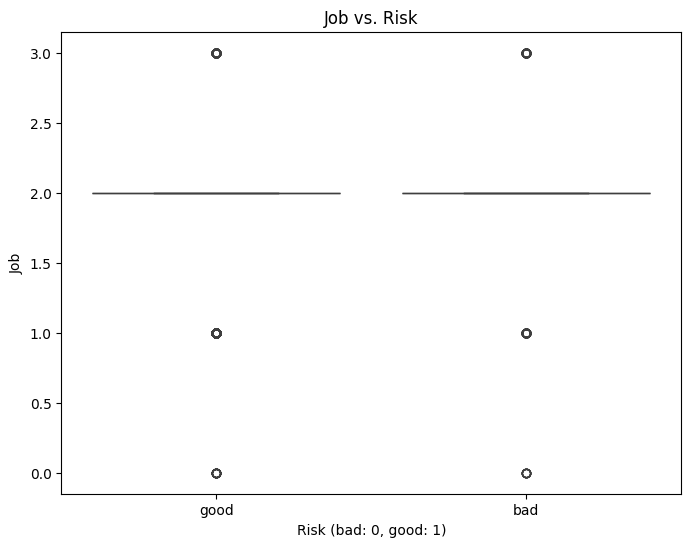

In [14]:
# Boxplot of 'R' by 'loan_status'
print("\nValue Counts for Job:")
print(data['Job'].value_counts())

plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Job', data=data)
plt.title('Job vs. Risk')
plt.xlabel('Risk (bad: 0, good: 1)')
plt.ylabel('Job')
plt.show()


--- Categorical Feature Analysis ---


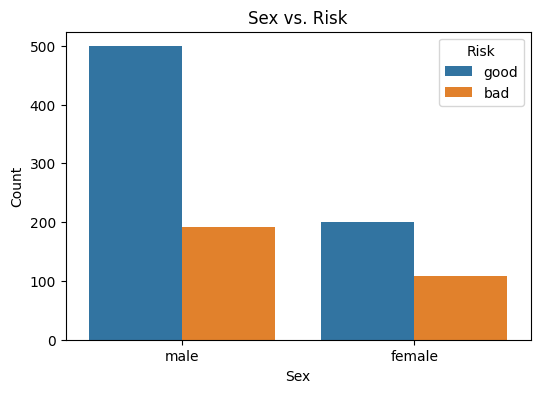

Chi-squared test
Chi-squared statistic: 5.348516218081436
p-value: 0.020739913068713305
Degrees of freedom: 1
Expected frequencies:
[[ 93. 217.]
 [207. 483.]]


In [20]:
# --- 4. Categorical Feature Analysis ---
from scipy.stats import chi2_contingency
print("\n--- Categorical Feature Analysis ---")

# 4.1 Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Risk', data=data)
plt.title('Sex vs. Risk')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

if len(data['Sex'].unique()) > 1:
    contingency_table = pd.crosstab(data['Sex'], data['Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
print(f"Chi-squared test")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")  
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")


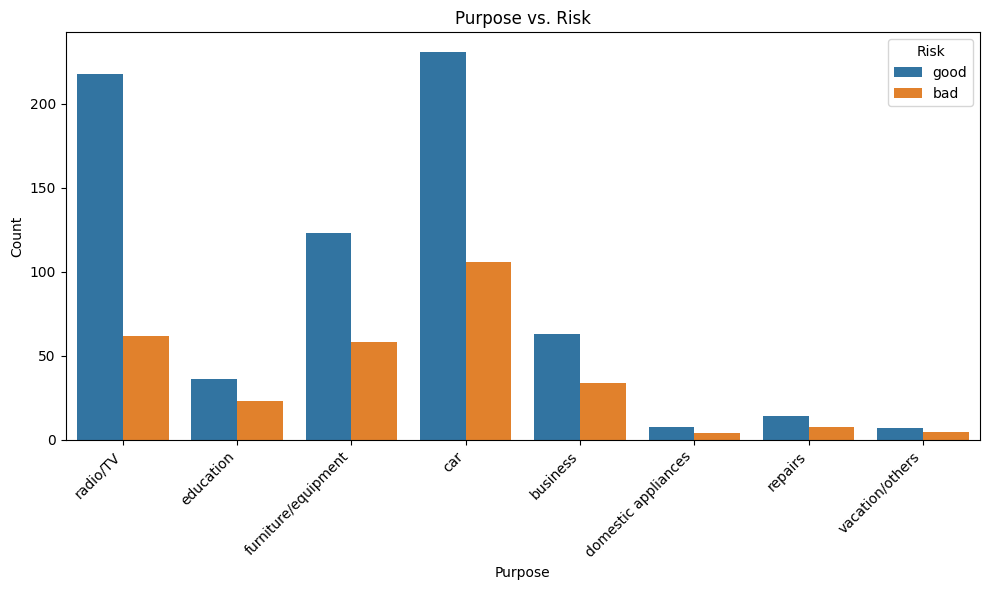

Chi-Squared Test (Purpose): Chi2 = 13.642086296939734, P-value = 0.05792591119293633


In [28]:
# 4.2 Purpose

plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', hue='Risk', data=data)
plt.title('Purpose vs. Risk')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

if len(data['Purpose'].unique()) > 1:
    contingency_table = pd.crosstab(data['Purpose'], data['Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Squared Test (Purpose): Chi2 = {chi2}, P-value = {p}")

In [33]:
data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

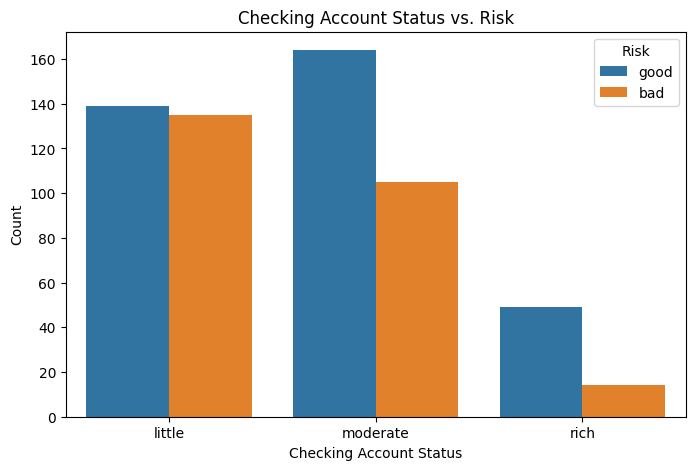

Chi-Squared Test (Checking Account): Chi2 = 17.04082801454835, P-value = 0.00019935687308106684


In [39]:
# 4.3 Checking Account

plt.figure(figsize=(8, 5))

sns.countplot(x='Checking account', hue='Risk', data=data)
plt.title('Checking Account Status vs. Risk')
plt.xlabel('Checking Account Status')
plt.ylabel('Count')
plt.show()
if len(data['Checking account'].unique()) > 1:
    contingency_table = pd.crosstab(data['Checking account'], data['Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Squared Test (Checking Account): Chi2 = {chi2}, P-value = {p}")
else:
    print("Not enough unique values in 'checking_account' for Chi-Squared Test")

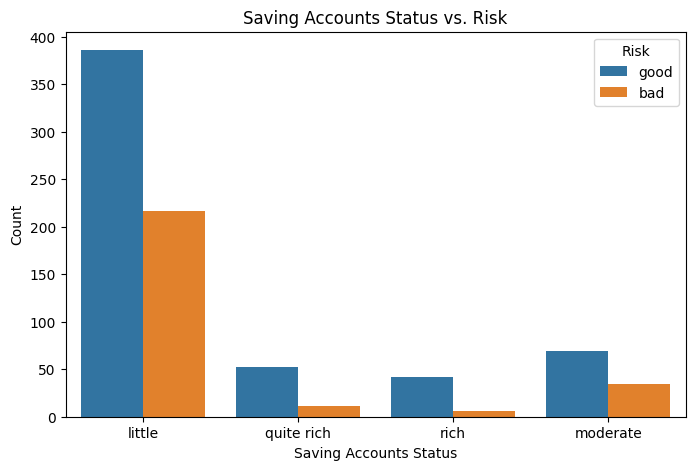

Chi-squared test
Chi-squared statistic: 18.479089902588285
p-value: 0.00035029499291971256
Degrees of freedom: 3
Expected frequencies:
[[197.80171359 405.19828641]
 [ 33.7870257   69.2129743 ]
 [ 20.66585067  42.33414933]
 [ 15.74541004  32.25458996]]


In [41]:
# 4.4 Saving Accounts

plt.figure(figsize=(8, 5))
sns.countplot(x='Saving accounts', hue='Risk', data=data)
plt.title('Saving Accounts Status vs. Risk')
plt.xlabel('Saving Accounts Status')
plt.ylabel('Count')
plt.show()


if len(data['Saving accounts'].unique()) > 1:
    contingency_table = pd.crosstab(data['Saving accounts'], data['Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test")
    print(f"Chi-squared statistic: {chi2}")
    print(f"p-value: {p}")  
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies:\n{expected}")



--- Correlation Analysis ---


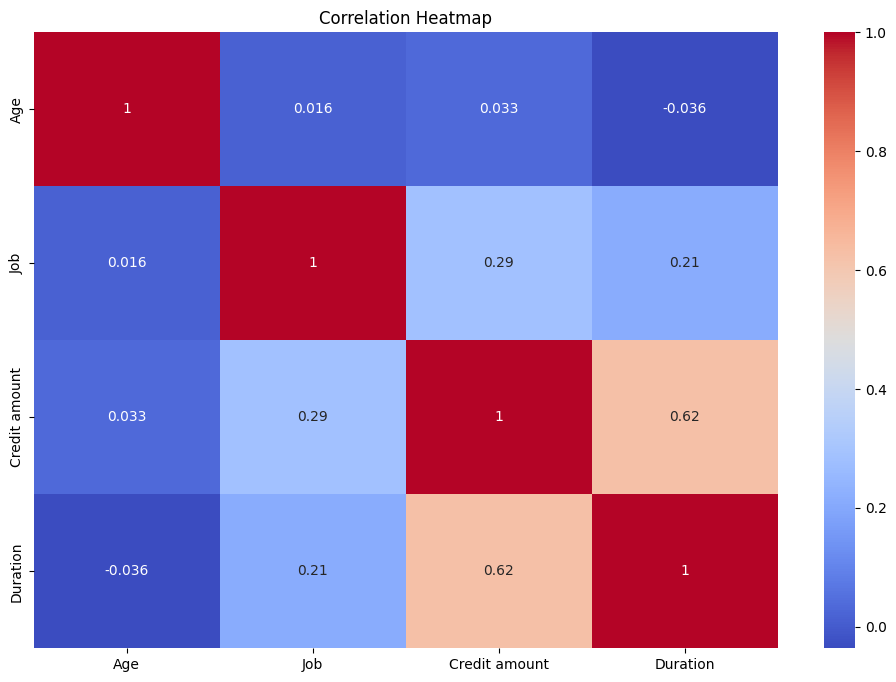

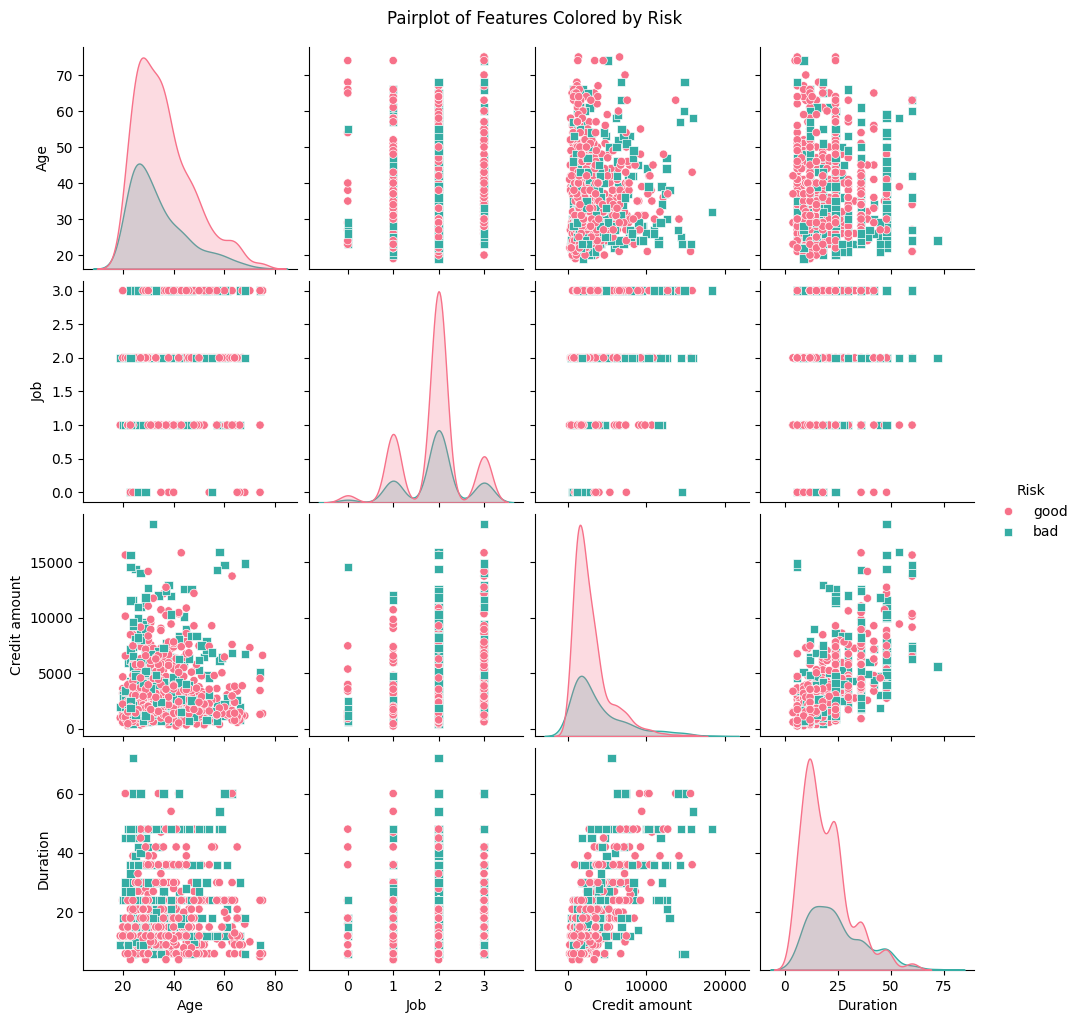

In [23]:
# --- 5. Correlation Analysis ---
print("\n--- Correlation Analysis ---")
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Explicitly numeric_only
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (can be computationally expensive for many features)
sns.pairplot(data, hue='Risk', diag_kind='kde', markers=["o", "s"], palette="husl")
plt.suptitle('Pairplot of Features Colored by Risk', y=1.02)  # Adjust title position
plt.show()

In [42]:
# Importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame and you want to one-hot encode it
# The 'drop_first=True' argument avoids dummy variable trap
# FIX: `data.drop` is incomplete. You likely meant something like `data.drop(columns=[...])`
# Also `.dtype(int)` is incorrect; probably you meant `.astype(int)`
df = pd.get_dummies(data.drop(columns=['Risk']), drop_first=True).astype(int)

# Preview the processed dataframe
df.head()


,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
X = df
y = pd.get_dummies(data['Risk'])

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
mlflow.end_run()

In [47]:
# Combine X and y before splitting
data_encoded = pd.get_dummies(data.drop(columns=["Risk"]))
y = data["Risk"]

X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_param("rf_n_estimator", rf.n_estimators)
     # Log model
    mlflow.sklearn.log_model(rf_fit, "log_reg_model")

2025/05/17 23:42:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [48]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74


In [58]:
mlflow.end_run()

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)
y = data["Risk"]

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_scaled, y)

with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_param("max_iter", log_reg.max_iter)
    mlflow.log_metric("accuracy", accuracy)
    # Log model
    mlflow.sklearn.log_model(log_reg, "log_reg_model")

2025/05/17 23:48:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [60]:
y_reg_pred = log_reg.predict(X_test)
accuracy = log_reg.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.295


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [61]:
accuracy = accuracy_score(y_test, y_reg_pred)
print("Accuracy:", accuracy)

Accuracy: 0.295


In [63]:
from huggingface_hub import HfApi

api = HfApi()

models = list(api.list_models(limit=3))

# Print the first 2 models
for model in models:
    print(model)

ModelInfo(id='nvidia/parakeet-tdt-0.6b-v2', author=None, sha=None, created_at=datetime.datetime(2025, 4, 15, 19, 31, 12, tzinfo=datetime.timezone.utc), last_modified=None, private=False, disabled=None, downloads=202168, downloads_all_time=None, gated=None, gguf=None, inference=None, likes=897, library_name='nemo', tags=['nemo', 'automatic-speech-recognition', 'speech', 'audio', 'Transducer', 'TDT', 'FastConformer', 'Conformer', 'pytorch', 'NeMo', 'hf-asr-leaderboard', 'en', 'dataset:librispeech_asr', 'dataset:fisher_corpus', 'dataset:mozilla-foundation/common_voice_8_0', 'dataset:National-Singapore-Corpus-Part-1', 'dataset:vctk', 'dataset:voxpopuli', 'dataset:europarl', 'dataset:multilingual_librispeech', 'arxiv:2305.05084', 'arxiv:2304.06795', 'arxiv:2406.00899', 'arxiv:2410.01036', 'license:cc-by-4.0', 'model-index', 'region:us'], pipeline_tag='automatic-speech-recognition', mask_token=None, card_data=None, widget_data=None, model_index=None, config=None, transformers_info=None, tren

In [70]:
# Importing pipeline from transformers
from transformers import pipeline
import tensorflow as tf

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
my__pipeline = pipeline(
    "text-classification",
    model = "distilbert-base-uncased-finetuned-sst-2-english"
    
)




In [5]:
# Importing pipeline from transformers
from transformers import pipeline
import tensorflow as tf
my_pipeline2 = pipeline(
    "text-generation",
    model = "gpt2"
    
)

result = my_pipeline2("What if AI", max_length=10, num_return_sequences=2, truncation=True)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [9]:
from transformers import pipeline, GPT2Tokenizer

# Load tokenizer and set pad_token to eos_token
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Define the pipeline with pad_token_id set
my_pipeline2 = pipeline(
    "text-generation",
    model="gpt2",
    tokenizer=tokenizer
)

# Run generation with pad_token_id
results = my_pipeline2(
    "What if AI",
    max_length=10,
    num_return_sequences=2,
    pad_token_id=tokenizer.eos_token_id,  # avoids the warning
    truncation=True
    
)
for result in results:
    print(result)

{'generated_text': 'What if AI is an interesting idea with good social'}
{'generated_text': 'What if AI did not have to interact with humans'}


In [ ]:
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, pipeline

# Load dataset
dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split="train")

# Load tokenizer and model
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = GPT2LMHeadModel.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))

# Tokenize and add labels
def tokenize_function(example):
    tokens = tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)
    tokens["labels"] = tokens["input_ids"].copy()  # Add labels for loss calculation
    return tokens

tokenized_dataset = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# Training setup
training_args = TrainingArguments(
    output_dir="./gpt2-wikitext2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    fp16=False  # set to True if you have GPU with FP16 support
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
)

# Train and save
trainer.train()
trainer.save_model("./gpt2-wikitext2-finetuned")
tokenizer.save_pretrained("./gpt2-wikitext2-finetuned")

# Generate sample output
generator = pipeline("text-generation", model="./gpt2-wikitext2-finetuned", tokenizer=tokenizer)
print(generator("The future of AI is", max_length=50, num_return_sequences=1))
